<h1>Анализ дэйтингового приложения</h1><br>
<h6>
Представьте, что вы работаете в крупном дейтинговом приложении.<br>

Помимо базовых функций, в приложении также имеется премиум-подписка, которая дает доступ к ряду важных дополнительных возможностей. <br>
Был проведен A/B тест, в рамках которого для новых пользователей из нескольких стран была изменена стоимость премиум-подписки* при покупке через две новые платежные системы. При этом стоимость пробного периода оставалась прежней.

Проверьте:
1. Был ли эксперимент успешен в целом.<br>
<i>(*Деньги за подписку списываются ежемесячно до тех пор, пока пользователь её не отменит.)</i>
</h6>

<h3>Данные</h3>

Всего есть три группы: тестовая (test), контрольная 1 (control_1) и контрольная 2 (control_2). <br>
Для каждой из них:

<i><b>users_*.csv – информация о пользователях:</i></b>
- uid – идентификатор пользователя
- age – возраст
- attraction_coeff – коэффициент привлекательности (от 0 до 1000, (лайки/просмотры)*1000)
- coins – число монеток (внутренняя валюта)
- country – страна  
- visit_days – в какие дни после регистрации пользователь посещал приложение (напр. в 1, затем в 7)
- gender – пол
- age_filter_start  – фильтр поиска, мин. значение 
- age_filter_end  – фильтр поиска, макс. значение 
- views_count – число полученных оценок 
- was_premium – был ли когда-либо премиум (либо пробный период премиум-статуса, либо купленный за деньги)
- is_premium –  является ли премиум
- total_revenue – нормированная выручка <br>

<i><b>transactions_*.csv – информация о платежах пользователей:</i></b>
- uid – идентификатор пользователя
- country – страна
- joined_at – дата и время регистрации
- paid_at – дата и время покупки
- revenue – нормированная выручка
- payment_id – идентификатор платежа
- from_page – откуда пользователь перешел на страницу оплаты
- product_type – тип продукта (trial_premium – пробная премиум-подписка, premium_no_trial – премиум-подписка без пробной, coins – подписка за внутреннюю валюту, other_type – другое) 


<h3>Файлы:</h3>

- users_test – информация о пользователях в тестовой группе. 
- users_control_1 – информация о пользователях в первой контрольной группе. 
- users_control_2 – информация о пользователях во второй контрольной группе . 
- transactions_test – информация о платежах пользователей в тестовой группе. 
- transactions_control_1 – информация о платежах пользователей в первой контрольной группе. 
- transactions_control_2 – информация о платежах пользователей во второй контрольной группе 

<h3>Библиотеки

In [517]:
# Подключим библиотеки

import os

from datetime import datetime
from datetime import timedelta

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

from scipy import stats as ss
from scipy.stats import chi2_contingency, chi2
import pingouin as pg

# https://git.lab.karpov.courses/lab/final_project/-/blob/yulia_sergeeva_17.08_ju-sergeeva/variant3/Final_Project_Sergeeva_Yulia.ipynb

# https://git.lab.karpov.courses/lab/final_project/-/blob/leisan_khilazheva_17.08_l-hilazheva/variant3/final_project_variant3.ipynb

# https://git.lab.karpov.courses/lab/final_project/-/merge_requests/2031
# https://git.lab.karpov.courses/lab/final_project/-/blob/bauyrzhan_nurseitov_13.07_b-nurseitov/variant3/Final_Project_BN_var3.ipynb

<h3>Cчитывание данных

In [518]:
# Присвоим переменную датафрейму

df_users_test = pd.read_csv("~/FinalProject/Проект_3_users_test.csv", sep=';')
df_users_control_1 = pd.read_csv("~/FinalProject/Проект_3_users_control_1.csv", sep=';')
df_users_control_2 = pd.read_csv("~/FinalProject/Проект_3_users_control_2.csv", sep=';')

df_transactions_test = pd.read_csv("~/FinalProject/Проект_3_transactions_test.csv", sep=';', parse_dates=['joined_at', 'paid_at'])
df_transactions_control_1 = pd.read_csv("~/FinalProject/Проект_3_transactions_control_1.csv", sep=';', parse_dates=['joined_at', 'paid_at'])
df_transactions_control_2 = pd.read_csv("~/FinalProject/Проект_3_transactions_control_2.csv", sep=';', parse_dates=['joined_at', 'paid_at'])

<h2><u>Блок анализа данных

<h3>Размеры исходных таблиц

In [519]:
# Размеры DF

print("Размер таблицы df_users_test: \n{}".format(df_users_test.shape), "\n")
print("Размер таблицы df_users_control_1: \n{}".format(df_users_control_1.shape), "\n")
print("Размер таблицы df_users_control_2: \n{}".format(df_users_control_2.shape), "\n")

print("Размер таблицы df_transactions_test: \n{}".format(df_transactions_test.shape), "\n")
print("Размер таблицы df_transactions_control_1: \n{}".format(df_transactions_control_1.shape), "\n")
print("Размер таблицы df_transactions_control_2: \n{}".format(df_transactions_control_2.shape), "\n")

Размер таблицы df_users_test: 
(4308, 13) 

Размер таблицы df_users_control_1: 
(4340, 13) 

Размер таблицы df_users_control_2: 
(4264, 13) 

Размер таблицы df_transactions_test: 
(273, 8) 

Размер таблицы df_transactions_control_1: 
(1007, 8) 

Размер таблицы df_transactions_control_2: 
(328, 8) 



<h3> Типы данных таблиц и их изменение

In [520]:
# Типы данных DF

# Приведем данные-категориальные в один str тип

df_users_test = df_users_test.astype({"uid":"str",
                                      "gender":"str" })

df_users_control_1 = df_users_control_1.astype({"uid":"str",
                                                "gender":"str" })

df_users_control_2 = df_users_control_2.astype({"uid":"str",
                                                "gender":"str" })

df_transactions_test = df_transactions_test.astype({"uid":"str",
                                                    "payment_id":"str" })

df_transactions_control_1 = df_transactions_control_1.astype({"payment_id":"str" })

df_transactions_control_2 = df_transactions_control_2.astype({"uid":"str",
                                                              "payment_id":"str" })



print("Типы данных таблицы df_users_test: \n{}".format(df_users_test.dtypes), "\n")
print("Типы данных таблицы df_users_control_1: \n{}".format(df_users_control_1.dtypes), "\n")
print("Типы данных таблицы df_users_control_2: \n{}".format(df_users_control_2.dtypes), "\n")

print("Типы данных таблицы df_transactions_test: \n{}".format(df_transactions_test.dtypes), "\n")
print("Типы данных таблицы df_transactions_control_1: \n{}".format(df_transactions_control_1.dtypes), "\n")
print("Типы данных таблицы df_transactions_control_2: \n{}".format(df_transactions_control_2.dtypes), "\n")

Типы данных таблицы df_users_test: 
uid                  object
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender               object
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
dtype: object 

Типы данных таблицы df_users_control_1: 
uid                  object
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender               object
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
dtype: object 

Типы данных таблицы df_users_control_2: 
uid                  object
age                   int64
attraction_coeff      int64
coins               float64
country   

<h3>Пропуски в данных и анализ этих пропусков

In [521]:
# Пропуски данных DF

print("Пропуски данных таблицы df_users_test: \n{}".format(df_users_test.isna().sum()), "\n")
print("Пропуски данных таблицы df_users_control_1: \n{}".format(df_users_control_1.isna().sum()), "\n")
print("Пропуски данных таблицы df_users_control_2: \n{}".format(df_users_control_2.isna().sum()), "\n")

print("Пропуски данных таблицы df_transactions_test: \n{}".format(df_transactions_test.isna().sum()), "\n")
print("Пропуски данных таблицы df_transactions_control_1: \n{}".format(df_transactions_control_1.isna().sum()), "\n")
print("Пропуски данных таблицы df_transactions_control_2: \n{}".format(df_transactions_control_2.isna().sum()), "\n")

Пропуски данных таблицы df_users_test: 
uid                    0
age                    0
attraction_coeff       0
coins               4259
country                0
visit_days          1330
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3900
is_premium          4151
total_revenue          0
dtype: int64 

Пропуски данных таблицы df_users_control_1: 
uid                    0
age                    0
attraction_coeff       0
coins               4280
country                0
visit_days          1324
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3904
is_premium          4148
total_revenue          0
dtype: int64 

Пропуски данных таблицы df_users_control_2: 
uid                    0
age                    0
attraction_coeff       0
coins               4203
country                0
visit_days          1364
gender                 0
age_filter_star

In [522]:
# В таблице df_transactions_control_1 630 строк пустые можно их сразу удалить, при чём они идут строго по порядку
# Они же и не дают поменять тип данных в этой таблице в колонке uid

# До 376 строчки значения есть, а вот с 377 и до конца сплошные пропуски
df_transactions_control_1.iloc[:377].query('uid == "NaN"')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type


In [523]:
# Как раз 630 пропусков, просто уберем эти значения
df_transactions_control_1.iloc[375:].query('uid == "NaN"')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
377,NaN,NaN,NaT,NaT,NaN,nan,NaN,NaN
378,NaN,NaN,NaT,NaT,NaN,nan,NaN,NaN
379,NaN,NaN,NaT,NaT,NaN,nan,NaN,NaN
380,NaN,NaN,NaT,NaT,NaN,nan,NaN,NaN
381,NaN,NaN,NaT,NaT,NaN,nan,NaN,NaN
...,...,...,...,...,...,...,...,...
1002,NaN,NaN,NaT,NaT,NaN,nan,NaN,NaN
1003,NaN,NaN,NaT,NaT,NaN,nan,NaN,NaN
1004,NaN,NaN,NaT,NaT,NaN,nan,NaN,NaN
1005,NaN,NaN,NaT,NaT,NaN,nan,NaN,NaN


In [524]:
# Уберем значения с NaN
df_transactions_control_1 = df_transactions_control_1.iloc[:377]

# А также изменим формат колонки uid (уберем 0-ли и в строковый формат)
df_transactions_control_1.uid = df_transactions_control_1.uid.astype("int").astype("str")

print("Размер таблицы df_transactions_control_1: \n{}".format(df_transactions_control_1.shape), "\n")
print("Типы данных таблицы df_transactions_control_1: \n{}".format(df_transactions_control_1.isna().sum()), "\n")

Размер таблицы df_transactions_control_1: 
(377, 8) 

Типы данных таблицы df_transactions_control_1: 
uid             0
country         0
joined_at       0
paid_at         0
revenue         0
payment_id      0
from_page       0
product_type    0
dtype: int64 



<h3> Проверка и подсчёт пользователей



In [525]:
# Посмотрим число уникальных юзеров в каждой группе

print(f'Количество уникальных пользователей в группе test {df_users_test.uid.nunique()} равняется длине таблицы {df_users_test.uid.shape[0]}.')
print(f'Количество уникальных пользователей в группе test {df_users_control_1.uid.nunique()} равняется длине таблицы {df_users_control_1.uid.shape[0]}.')
print(f'Количество уникальных пользователей в группе test {df_users_control_2.uid.nunique()} равняется длине таблицы {df_users_control_2.uid.shape[0]}.')

Количество уникальных пользователей в группе test 4308 равняется длине таблицы 4308.
Количество уникальных пользователей в группе test 4340 равняется длине таблицы 4340.
Количество уникальных пользователей в группе test 4264 равняется длине таблицы 4264.


In [526]:
# Посмотрим число уникальных клиентов в каждой группе

print(f'Количество уникальных пользователей в группе test {df_transactions_test.uid.nunique()} не равняется длине таблицы {df_transactions_test.uid.shape[0]}.')
print(f'Количество уникальных пользователей в группе test {df_transactions_control_1.uid.nunique()} не равняется длине таблицы {df_transactions_control_1.uid.shape[0]}.')
print(f'Количество уникальных пользователей в группе test {df_transactions_control_2.uid.nunique()} не равняется длине таблицы {df_transactions_control_2.uid.shape[0]}.')

Количество уникальных пользователей в группе test 146 не равняется длине таблицы 273.
Количество уникальных пользователей в группе test 193 не равняется длине таблицы 377.
Количество уникальных пользователей в группе test 187 не равняется длине таблицы 328.


In [527]:
# Проверим - нет ли в таблицах о платежах юзеров, которых нет в таблице юзеров

print(f'Для группы test.\nКоличесво юзеров в платежах, которых нет в таблице юзеров = {df_transactions_test.query("uid not in @df_users_test.uid.unique().tolist()").uid.nunique()}.')
print(f'Для группы control_1.\nКоличесво юзеров в платежах, которых нет в таблице юзеров = {df_transactions_control_1.query("uid not in @df_users_control_1.uid.unique().tolist()").uid.nunique()}.')
print(f'Для группы control_2.\nКоличесво юзеров в платежах, которых нет в таблице юзеров = {df_transactions_control_2.query("uid not in @df_users_control_2.uid.unique().tolist()").uid.nunique()}.')

Для группы test.
Количесво юзеров в платежах, которых нет в таблице юзеров = 0.
Для группы control_1.
Количесво юзеров в платежах, которых нет в таблице юзеров = 0.
Для группы control_2.
Количесво юзеров в платежах, которых нет в таблице юзеров = 0.


In [528]:
# Года регистраций в разных группах

transactions_test_years = str(df_transactions_test.query("joined_at != 'NaT'").joined_at.dt.year.unique().tolist()).strip('[]')
print(f'Для группы transactions_test.\nГода регистраций юзеров {transactions_test_years}.\n')

transactions_control_1_years = str(df_transactions_control_1.query("joined_at != 'NaT'").joined_at.dt.year.unique().tolist()).strip('[]')
print(f'Для группы transactions_control_1.\nГода регистраций юзеров {transactions_control_1_years}.\n')

transactions_control_2_years = str(df_transactions_control_2.query("joined_at != 'NaT'").joined_at.dt.year.unique().tolist()).strip('[]')
print(f'Для группы transactions_control_2.\nГода регистраций юзеров {transactions_control_2_years}.')

Для группы transactions_test.
Года регистраций юзеров 2017.

Для группы transactions_control_1.
Года регистраций юзеров 2017, 2015.

Для группы transactions_control_2.
Года регистраций юзеров 2017.


<h3>Ошибки в колонке "paid_at"

In [529]:
# Проверим, есть ли ситуации, при которых дата регистрации позже даты отплаты

print(f'Для группы test.\nОшибки, где дата регистрации позже даты отплаты встречается у {df_transactions_test.query("joined_at > paid_at").uid.nunique()} юникальных юзеров.\n')
print(f'Для группы control_1.\nОшибки, где дата регистрации позже даты отплаты встречается у {df_transactions_control_1.query("joined_at > paid_at").uid.nunique()} юникальных юзеров.\n')
print(f'Для группы control_2.\nОшибки, где дата регистрации позже даты отплаты встречается у {df_transactions_control_2.query("joined_at > paid_at").uid.nunique()} юникальных юзеров.')

Для группы test.
Ошибки, где дата регистрации позже даты отплаты встречается у 35 юникальных юзеров.

Для группы control_1.
Ошибки, где дата регистрации позже даты отплаты встречается у 37 юникальных юзеров.

Для группы control_2.
Ошибки, где дата регистрации позже даты отплаты встречается у 41 юникальных юзеров.


In [530]:
df_transactions_test.query("joined_at > paid_at").head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
11,891861048,Canada,2017-10-26 02:55:00,2017-10-11 19:00:00,3588,68,none,premium_no_trial
20,891806280,United States of America,2017-10-27 08:56:00,2017-03-11 10:57:00,8242,147,trial_vip_popup,trial_premium
24,891786216,Spain,2017-10-27 18:20:00,2017-03-11 20:20:00,12818,147,trial_vip_popup,trial_premium
25,892057347,France,2017-10-21 23:15:00,2017-08-11 01:56:00,1209,19,none,coins
36,891589239,Italy,2017-10-31 14:16:00,2017-09-11 15:44:00,6305,19,empty_likes,coins


In [531]:
print("Видно, скорее всего в колонке оплаты перепутаны местами месяц и число. Так как все ошибки связаны с 11-м числом.")

Видно, скорее всего в колонке оплаты перепутаны местами месяц и число. Так как все ошибки связаны с 11-м числом.


In [532]:
# Функция исправления даты покупки "paid_at" - перестановка местами дня и месяца
def reverse_data_day_month(full_df):
    """
    Эта функция меняет местами дни и месяцы в сломанной колонке 'paid_at'.
    Сломан день 11, и это повторяется во всех датафреймах, на самом деле это 11й месяц.
    Аргумент функциии - исходный датафрейм
    """
    
    # Отберем только даты с ошибками
    df_BAD_paid_at = full_df.query("joined_at > paid_at")
    # Переведем даты с оштбками в str
    df_bad_paid_at_RE_paid_at = df_BAD_paid_at.paid_at.dt.strftime('%Y-%m-%d %H:%M:%S')
    # Переведем обратно из str в datetime, но с обратным форматом месяца и дня
    df_bad_paid_at_RE_paid_at = pd.to_datetime(df_bad_paid_at_RE_paid_at, format='%Y-%d-%m %H:%M:%S')
    # Преобразуем серию в DF с названием колонки "paid_at"
    df_bad_paid_at_RE_paid_at = pd.DataFrame(df_bad_paid_at_RE_paid_at, columns=["paid_at"])
    
    # Объединим DF c неправильной и правильной датами по индексу
    df_GOOD_paid_at = df_BAD_paid_at.merge(df_bad_paid_at_RE_paid_at, how="left", left_index = True, right_index = True)
    # Удалим неправильную дату
    df_GOOD_paid_at.drop(labels="paid_at_x", axis=1, inplace=True)
    # И изменим имя правильной даты
    df_GOOD_paid_at.rename(columns={"paid_at_y":"paid_at"}, inplace=True)
    
    # Добавим исправленные строки в в отфильтрованный DF и отфильтруем по индексу
    full_df = full_df\
                                     .query("joined_at <= paid_at")\
                                     .append(df_GOOD_paid_at)\
                                     .sort_index(ascending=True)
    return full_df

In [533]:
# Вызовем ф-ю для каждого датафрейма
df_transactions_test = reverse_data_day_month(df_transactions_test)
df_transactions_control_1 = reverse_data_day_month(df_transactions_control_1)
df_transactions_control_2 = reverse_data_day_month(df_transactions_control_2)

In [534]:
# Проверим на наличие ошибок
df_transactions_test.query("joined_at > paid_at").nunique()

uid             0
country         0
joined_at       0
paid_at         0
revenue         0
payment_id      0
from_page       0
product_type    0
dtype: int64

<h3> Найдем MAX и MIN даты регистрации и покупок

In [535]:
df_transactions_test.describe(include='datetime')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,joined_at,paid_at
count,273,273
unique,146,258
top,2017-10-18 01:09:00,2017-10-22 22:08:00
freq,14,4
first,2017-01-11 03:07:00,2017-02-11 13:43:00
last,2017-10-31 23:40:00,2017-12-11 22:06:00


In [536]:
df_transactions_control_1.describe(include='datetime')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,joined_at,paid_at
count,377,377
unique,193,335
top,2017-10-16 01:38:00,2017-10-16 02:08:00
freq,27,5
first,2015-01-19 11:49:00,2016-12-14 16:16:00
last,2017-10-31 22:17:00,2017-12-11 21:57:00


In [537]:
df_transactions_control_2.describe(include='datetime')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,joined_at,paid_at
count,328,328
unique,187,309
top,2017-10-30 15:22:00,2017-10-23 20:17:00
freq,11,3
first,2017-01-11 08:36:00,2017-02-11 21:52:00
last,2017-10-31 17:43:00,2017-12-11 23:28:00


<h3> Объединим таблицы данных по группам

In [538]:
test = df_users_test.merge(df_transactions_test, on=["uid", "country"], how="left")
control_1 = df_users_control_1.merge(df_transactions_control_1, on=["uid", "country"], how="left")
control_2 = df_users_control_2.merge(df_transactions_control_2, on=["uid", "country"], how="left")

<h3> Проверим колонку "was_premium", тк если у кого-то он был, значит пользователь принес нам деньги.

In [539]:
# Проверим случай, когда общей прибыли нет, но у юзера был кагда-то премиум
test.query("(total_revenue == 'NaN' or total_revenue <= 0) and (was_premium == 1)")
control_1.query("(total_revenue == 'NaN' or total_revenue <= 0) and (was_premium == 1)")
control_2.query("(total_revenue == 'NaN' or total_revenue <= 0) and (was_premium == 1)")
print("Случаев, когда нет прибыли с пользователя, но при этом он был когда-то премиум достаточно в каждом DF.\
      \nЗначит колонка 'was_premium' не поможет при дальнейшем анализе данных.")

Случаев, когда нет прибыли с пользователя, но при этом он был когда-то премиум достаточно в каждом DF.      
Значит колонка 'was_premium' не поможет при дальнейшем анализе данных.


<h3> Проверим колонку "is_premium", "product_type" соответствует ожиданиям.

In [540]:
test\
        .query("is_premium != 1 and product_type in ['premium_no_trial', 'coins', 'trial_premium', 'other_type']")\
       .groupby('product_type', as_index=False).agg({"uid":"count"})

,product_type,uid
0,coins,21
1,other_type,5
2,premium_no_trial,7


In [541]:
control_1\
        .query("is_premium != 1 and product_type in ['premium_no_trial', 'coins', 'trial_premium', 'other_type']")\
       .groupby('product_type', as_index=False).agg({"uid":"count"})

,product_type,uid
0,coins,40
1,other_type,19
2,premium_no_trial,13
3,trial_premium,1


In [542]:
control_2\
        .query("is_premium != 1 and product_type in ['premium_no_trial', 'coins', 'trial_premium', 'other_type']")\
       .groupby('product_type', as_index=False).agg({"uid":"count"})

,product_type,uid
0,coins,34
1,other_type,14
2,premium_no_trial,10
3,trial_premium,1


In [543]:
print("На колонку 'is_premium' такэже нельзя полагаться, тк она пропущена во многих случаях премиум-подписки.")

На колонку 'is_premium' такэже нельзя полагаться, тк она пропущена во многих случаях премиум-подписки.


<h3> Проверим колонку "visit_days"

In [544]:
test.astype({'visit_days':"str"}).query("visit_days == 'nan' and joined_at != 'NaN' and paid_at != 'NaN'").head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,joined_at,paid_at,revenue,payment_id,from_page,product_type
140,891919368,29,250,NaN,France,nan,1,26,32,4,1.0,1.0,16536,2017-10-24 21:21:00,2017-10-31 23:21:00,16536.0,147,trial_vip_popup,trial_premium
194,891786216,21,250,NaN,Spain,nan,1,18,24,4,1.0,1.0,12818,2017-10-27 18:20:00,2017-11-03 20:20:00,12818.0,147,trial_vip_popup,trial_premium
226,892211106,33,0,NaN,France,nan,1,30,36,4,1.0,1.0,4537,2017-10-18 17:09:00,2017-10-18 17:31:00,4537.0,147,left_sidebar_menu,premium_no_trial
387,892408266,24,0,NaN,France,nan,1,21,27,1,1.0,1.0,16653,2017-10-14 18:47:00,2017-10-23 13:05:00,16653.0,147,autoreply_message,trial_premium
542,892084260,53,184,NaN,Canada,nan,1,50,56,119,1.0,1.0,9815,2017-10-21 13:30:00,2017-10-28 15:32:00,9815.0,147,trial_vip_popup,trial_premium


In [545]:
print("Нашлись случаи, когда якобы пользователь ниразу не заходил в сервис c момента регистрации, а при этом и имелась дата и время покупки.\
\nТаких случаев в тестовой группе набралось {} штук.".format(test.astype({'visit_days':"str"}).query("visit_days == 'nan' and joined_at != 'NaN' and paid_at != 'NaN'").shape[0]))

Нашлись случаи, когда якобы пользователь ниразу не заходил в сервис c момента регистрации, а при этом и имелась дата и время покупки.
Таких случаев в тестовой группе набралось 20 штук.


In [546]:
test.astype({'visit_days':"str"}).query("visit_days != 'nan' and joined_at == 'NaN' and paid_at == 'NaN'").head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,892309896,27,685,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,NaN,NaN,0,NaT,NaT,NaN,NaN,NaN,NaN
2,892185708,45,44,NaN,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,NaN,NaN,0,NaT,NaT,NaN,NaN,NaN,NaN
3,892130292,32,0,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,NaN,NaN,0,NaT,NaT,NaN,NaN,NaN,NaN
5,891083133,24,0,NaN,Spain,1,1,16,27,0,NaN,NaN,0,NaT,NaT,NaN,NaN,NaN,NaN
8,891085770,28,0,NaN,Italy,"1,2,3,4",1,25,31,1,NaN,NaN,0,NaT,NaT,NaN,NaN,NaN,NaN


In [547]:
print("Да и обратная ситуация имеется в очень большом количестве = {} штук.".format(test.astype({'visit_days':"str"}).query("visit_days != 'nan' and joined_at == 'NaN' and paid_at == 'NaN'").shape[0]))

Да и обратная ситуация имеется в очень большом количестве = 2851 штук.


In [548]:
print("Аналогичные ситуации в группах control_1 и control_2. В анализе колонку \"visit_days\" использовать нельзя.")

Аналогичные ситуации в группах control_1 и control_2. В анализе колонку "visit_days" использовать нельзя.


<h3> Проверим данные о поле пользователей.

In [549]:
print(\
"В каждом датафрейме должно быть всего 2 показателя.\
\nВ тестовой группе {}. \
\nВ контрольной 1 группе {}. \
\nВ контрольной 2 группе {}."\
.format(test.gender.unique().tolist(), control_1.gender.unique().tolist(), control_2.gender.unique().tolist()))

В каждом датафрейме должно быть всего 2 показателя.
В тестовой группе ['1', '0']. 
В контрольной 1 группе ['0', '1']. 
В контрольной 2 группе ['1', '0'].


<h3> Проверим данные о возрасте пользователей.

In [550]:
# Проверим пропуски (либо отрицательные, либо нулевые значения) в возрасте пользователей 
print(\
"В каждом датафрейме не должно быть пропусков в возрасте пользователя и нулевых и отрицательных значений.\
\nВ тестовой группе {} таких значений. \
\nВ контрольной 1 группе {} таких значений. \
\nВ контрольной 2 группе {} таких значений."\
.format(test.query("age <= 0 and age == 'NaT'").shape[0], \
        control_1.query("age <= 0 and age == 'NaT'").shape[0],\
        control_2.query("age <= 0 and age == 'NaT'").shape[0]))

В каждом датафрейме не должно быть пропусков в возрасте пользователя и нулевых и отрицательных значений.
В тестовой группе 0 таких значений. 
В контрольной 1 группе 0 таких значений. 
В контрольной 2 группе 0 таких значений.


In [551]:
# Проверим конечный возраст всегда ли больше начального
print(\
"В каждом датафрейме не должно быть, что конечный возраст в фильтре меньше начального возраста.\
\nВ тестовой группе {} таких значений. \
\nВ контрольной 1 группе {} таких значений. \
\nВ контрольной 2 группе {} таких значений."\
.format(test.query("age_filter_start >= age_filter_end").shape[0], \
        control_1.query("age_filter_start >= age_filter_end").shape[0],\
        control_2.query("age_filter_start >= age_filter_end").shape[0]))

В каждом датафрейме не должно быть, что конечный возраст в фильтре меньше начального возраста.
В тестовой группе 0 таких значений. 
В контрольной 1 группе 0 таких значений. 
В контрольной 2 группе 0 таких значений.


In [552]:
# Проверим соответствует ли фильтр возраста самому возрасту пользователя (правильно ли выставлен фильтр или есть ошибки)
print(\
"В каждом датафрейме возраст должен соответствовать возрастной группе (фильтру возрастов).\
\nВ тестовой группе несоответствий наблюдается у {} пользователей. \
\nВ контрольной 1 группе несоответствий наблюдается у {} пользователей. \
\nВ контрольной 2 группе несоответствий наблюдается у {} пользователей."\
.format(test.query("age < age_filter_start or age > age_filter_end").uid.nunique(), \
        control_1.query("age < age_filter_start or age > age_filter_end").uid.nunique(),\
        control_2.query("age < age_filter_start or age > age_filter_end").uid.nunique()))

print("\nИз этого следует, что анализ данных по возрастной группе проводить не стоит!")

В каждом датафрейме возраст должен соответствовать возрастной группе (фильтру возрастов).
В тестовой группе несоответствий наблюдается у 293 пользователей. 
В контрольной 1 группе несоответствий наблюдается у 297 пользователей. 
В контрольной 2 группе несоответствий наблюдается у 253 пользователей.

Из этого следует, что анализ данных по возрастной группе проводить не стоит!


<h3> Проверим данные виде платёжных систем, т.е. колонке "payment_id"

In [553]:
# Переведем все данные этой колонки в str, тк тяжело фильтровать пропущенные значения
test.payment_id = test.payment_id.astype("str")
control_1.payment_id = control_1.payment_id.astype("str")
control_2.payment_id = control_2.payment_id.astype("str")

In [554]:
# Посмотрим какие же уникальные платёжные системы применяются в каждой группе
test_payment_id = set(sorted(test.payment_id.unique().tolist(), reverse=False))
test_payment_id

{'0', '146', '147', '19', '67', '68', 'nan'}

In [555]:
control_1_payment_id = set(sorted(control_1.payment_id.unique().tolist(), reverse=False))
control_1_payment_id

{'0.0', '127.0', '146.0', '147.0', '19.0', '67.0', '68.0', 'nan'}

In [556]:
control_2_payment_id = set(sorted(control_2.payment_id.unique().tolist(), reverse=False))
control_2_payment_id

{'0', '146', '147', '19', '67', '68', 'nan'}

In [557]:
# Приведем колонку control_1.payment_id в нормальный вид (без нулей)

# Запишем содержимое колонки в переменную
control_1_payment_id = control_1.payment_id.str.split(".").str[0]
control_1_payment_id = pd.DataFrame(control_1_payment_id, columns=["payment_id"])

# Удалим из DF эту колонку
control_1.drop(labels="payment_id", axis="columns", inplace=True)

# Довавим нормальную колонку без нулей по индексам
control_1 = control_1.merge(control_1_payment_id, how="left", left_index = True, right_index = True) 

In [558]:
control_1_payment_id = set(sorted(control_1.payment_id.unique().tolist(), reverse=False))
control_1_payment_id

{'0', '127', '146', '147', '19', '67', '68', 'nan'}

In [559]:
print("Имеем множества в каждой группе, сравним их и выделим уникальные для каждой группы.")

Имеем множества в каждой группе, сравним их и выделим уникальные для каждой группы.


In [560]:
#  Найдем уникальные платежные системы для каждой группы
len(list(test_payment_id.difference(control_1_payment_id, control_2_payment_id)))

0

In [561]:
list(control_1_payment_id.difference(control_2_payment_id, test_payment_id))[0]

'127'

In [562]:
len(list(control_2_payment_id.difference(control_1_payment_id, test_payment_id)))

0

Мы видим уникальную платёжную систему лишь в группы control_1

<h3> Создадим колонку с группой в каждом DF и можно объединить все это в один DF.

In [563]:
test['group'] = 'test'
control_1['group'] = 'control_1'
control_2['group'] = 'control_2'
list_columns_names = test.columns.tolist()

# Присоединим друг к другу Датафреймы
general = pd.concat([test, control_1, control_2], axis=0)
general.shape[0]

13364

In [564]:
# Проверим количество строк у позученного датасета
test.shape[0]+control_1.shape[0]+control_2.shape[0]

13364

<h2> <u>Блок A/B тестов </u></h2>
    
    Был проведен A/B тест, в рамках которого для новых пользователей из нескольких стран была изменена стоимость премиум-подписки* при покупке через две новые платежные системы. При этом стоимость пробного периода оставалась прежней.
    (*Деньги за подписку списываются ежемесячно до тех пор, пока пользователь её не отменит.)
    
    Проверьте:
- Был ли эксперимент успешен в целом. 


Цель данного A/B теста - <u>повышение прибыли</u>. За счёт повышения стоимости премиум-подписки у новых пользователей из некоторых стран мы рассчитываем увеличить выручку. 
Из задания не ясно что даёт премиум-подписка, можно только фантазировать на эту тему.

Проверим <u><b>главную гипотезу</b></u> - может ли повышение стоимости подписки увеличить выручку.<br>
Проверим <u><b>прокси гипотезу</b></u> - может ли повышение стоимости подписки уронить конверсию в покупателя премиум-подписки.

Имеется 3 группы. 1 тестовая и 2 контрольные. .<br>
Как раз контрольные и нужны для проведения A/A теста для проверки правильности системы сплитования пользователей (что пользователи распределены однородно, случайно и равномерно по группам) - в таком случае метрики в A/A тесте должны быть не статзначимы, <u>т.е. не давать статзначимых различий!</u>

<h3> A/A тест на гл.гипотезу (повышение стоимости премиум-подписки - повышение выручки)

Проверим число операций через различные платёжные системы.<br>
Но имеет смысл отбросить "NaN" - тк данные криво записаны и мы не можем  знать наверняка какая система на самом деле использовалась, и вообще использовалась ли она!

In [565]:
#Проверим число операций через различные платёжные системы
control_1.query('payment_id != "nan"').groupby('payment_id', as_index=False).agg({"uid":'count'})

,payment_id,uid
0,0,5
1,127,5
2,146,32
3,147,155
4,19,121
5,67,41
6,68,18


In [566]:
control_2.query('payment_id != "nan"').groupby('payment_id', as_index=False).agg({"uid":'count'})

,payment_id,uid
0,0,1
1,146,30
2,147,145
3,19,95
4,67,43
5,68,14


In [567]:
# Теперь для проведения A/A теста посмотрим на cреднюю общую выручку в каждой группе (без привязки к платёжной системе) у новых пользователей
control_1.query('payment_id != "nan"').groupby('group', as_index=False).agg({"revenue":np.mean})

,group,revenue
0,control_1,6929.206897


In [568]:
control_2.query('payment_id != "nan"').groupby('group', as_index=False).agg({"revenue":np.mean})

,group,revenue
0,control_2,5854.993902


In [569]:
# Отсортируем пользователей по возрастунаю даты 1-го платежа
# Уберем все дубликаты пользователей, кроме 1-го значения
# Фильтруем по наличию премиум-подписки и наличию какой-либо платёжной системы
control_1_premium_newusers = control_1\
                                                                                                        .sort_values("paid_at", ascending=True)\
                                                                                                        .drop_duplicates(subset='uid', keep="first")\
                                                                                                        .query('payment_id != "nan" and product_type == "premium_no_trial"')

# Посчитаем стоимость подписки на уникального пользователя
control_1_premium_newusers_price = control_1_premium_newusers.revenue.sum() / control_1_premium_newusers.uid.nunique()
control_1_premium_newusers_price

7122.101123595506

In [570]:
# Отсортируем пользователей по возрастунаю даты 1-го платежа
# Уберем все дубликаты пользователей, кроме 1-го значения
# Фильтруем по наличию премиум-подписки и наличию какой-либо платёжной системы
control_2_premium_newusers = control_2\
                                                                                                        .sort_values("paid_at", ascending=True)\
                                                                                                        .drop_duplicates(subset='uid', keep="first")\
                                                                                                        .query('payment_id != "nan" and product_type == "premium_no_trial"')

# Посчитаем стоимость подписки на уникального пользователя
control_2_premium_newusers_price = control_2_premium_newusers.revenue.sum() / control_2_premium_newusers.uid.nunique()
control_2_premium_newusers_price

7288.955555555555

In [571]:
# Отсортируем пользователей по возрастунаю даты 1-го платежа
# Уберем все дубликаты пользователей, кроме 1-го значения
# Фильтруем по наличию премиум-подписки и наличию какой-либо платёжной системы
general_premium_newusers = general\
                                                                                                        .sort_values("paid_at", ascending=True)\
                                                                                                        .drop_duplicates(subset='uid', keep="first")\
                                                                                                        .query('payment_id != "nan" and product_type == "premium_no_trial"')

Text(0, 0.5, '')

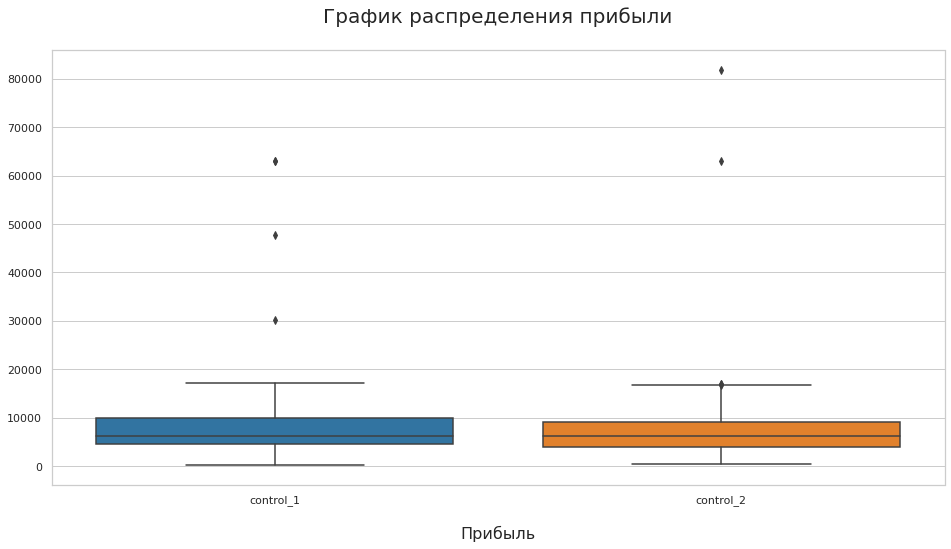

In [572]:
# Проверим распределения стоимстей премиум-подписки у каждой группы пользователей

# Изменяем размер графика
plt.figure(figsize=(16, 8))                    
sns.set(style='whitegrid', palette=None)

# Построим барплот
sns.boxplot(data=general_newusers.query("group != 'test'"), y="revenue", x="group")

# Затюним график
plt.title('График распределения прибыли\n', fontsize=20)
plt.xlabel('Прибыль', fontsize=16, rotation=0, labelpad=20)
plt.ylabel('', fontsize=16, rotation=0, labelpad=35)

Text(0, 0.5, '')

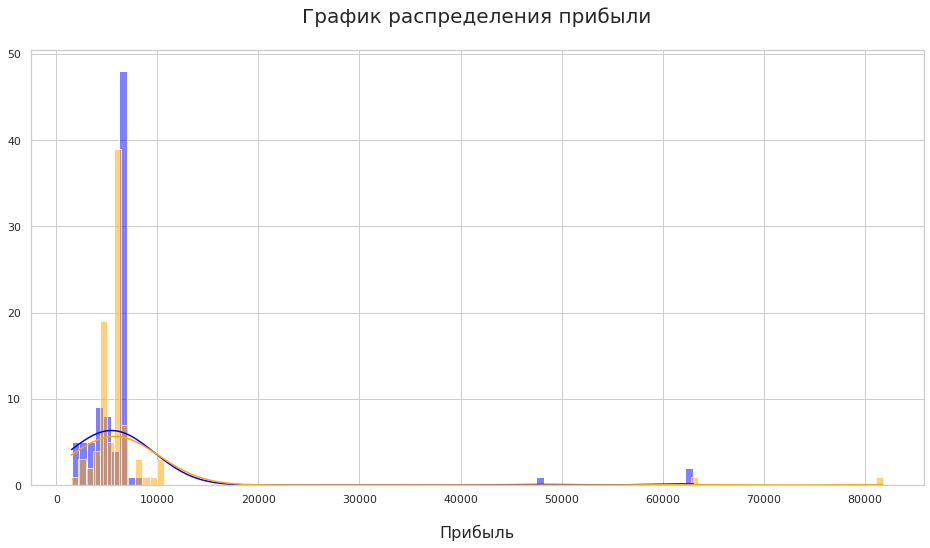

In [573]:
# Проверим распределения стоимстей премиум-подписки у каждой группы пользователей

# Изменяем размер графика
plt.figure(figsize=(16, 8))                    
sns.set(style='whitegrid', palette=None)

# Построим барплот
sns.histplot(data=control_1_premium_newusers.revenue, kde=True, color="blue")
sns.histplot(data=control_2_premium_newusers.revenue, kde=True, color="orange")

# Затюним график
plt.title('График распределения прибыли\n', fontsize=20)
plt.xlabel('Прибыль', fontsize=16, rotation=0, labelpad=20)
plt.ylabel('', fontsize=16, rotation=0, labelpad=35)

Для выполнения T-теста проверим условия:
    1. Распределения нормальны или размер выборки > 30
    2. Дисперсии распределений однородны

<b>Проверим размеры выборок распределений!</b><br>

In [574]:
print("Размеры выборок:\
\nв группе control_1 = {}, \
\nв группе control_2 = {}."\
      .format(control_1_premium_newusers.shape[0], control_2_premium_newusers.shape[0]))

Размеры выборок:
в группе control_1 = 89, 
в группе control_2 = 90.


<b>Проверим нормальность распределений!</b><br>
Cформулируем H0 для нормальности распределений - распределение нормально распределено.<br>
Cформулируем H1 для нормальности распределений - распределение не нормально распределено.

In [575]:
# Нормальность, используем levene тк выборка небольшого размера
print("P-value в группе control_1 = {}".format(ss.shapiro(control_1_premium_newusers.revenue).pvalue))
print("P-value в группе control_2 = {}".format(ss.shapiro(control_2_premium_newusers.revenue).pvalue))
print("Распределения revenue распределены не нормально, тк pvalue < 0.05.")

P-value в группе control_1 = 9.327743536484844e-19
P-value в группе control_2 = 2.2637283802676784e-19
Распределения revenue распределены не нормально, тк pvalue < 0.05.


<b>Проверим гомогенность дисперсий распределений!</b><br>
Cформулируем H0 для гомогенности дисперсий - дисперсии гомогенны.<br>
Cформулируем H1 для гомогенности дисперсий - дисперсии не гомогенны.

In [576]:
# Нормальность, используем levene тк выборка небольшого размера
print("P-value дисперсий в группах control_1 и control_2 = {}".format(ss.levene(control_1_premium_newusers.revenue, control_2_premium_newusers.revenue).pvalue))
print("Распределения дисперсий revenue гомогенны, тк pvalue > 0.05.")

P-value дисперсий в группах control_1 и control_2 = 0.8621889003615292
Распределения дисперсий revenue гомогенны, тк pvalue > 0.05.


В размеры выборок в группах > 30, то не сильно важно соблюдать уловие нормальности распределений, а также дисперсии распределений однородны.<br>
Поэтому можно использовать Т-критерий Стьюдента, для определения стат. различий между средними значениями в этих распределениях.<br>

<b>Т-тест.</b><br>
Cформулируем H0 для Т-теста - средние значения revenue равны.<br>
Cформулируем H1 для Т-теста - средние значения revenue не равны.

In [577]:
print("P-value T-теста группах control_1 и control_2 = {}".format(ss.ttest_ind(control_1_premium_newusers.revenue, control_2_premium_newusers.revenue).pvalue))
print("Различия средних значений revenue не стат. значимы, тк pvalue > 0.05.")

P-value T-теста группах control_1 и control_2 = 0.9105426013702382
Различия средних значений revenue не стат. значимы, тк pvalue > 0.05.


Из этого следует, что с точки зрения среднего значения прибыли контрольные группы распределены однородно, случайно и равномерно - система сплитования сработала правильно.

<h3>A/A тест на пр.гипотезу (повышение стоимости премиум-подписки - ухудшение конверсии в первую покупку премиум подписки)

In [578]:
# Посчитаем количество новых пользователей (т.е. имеют колонку "joined_at")
control_1_newusers = control_1\
                                                                        .query("joined_at != 'NaT'")\
                                                                        .sort_values("paid_at", ascending=True)\
                                                                        .drop_duplicates(subset='uid', keep="first")

control_2_newusers = control_2\
                                                                        .query("joined_at != 'NaT'")\
                                                                        .sort_values("paid_at", ascending=True)\
                                                                        .drop_duplicates(subset='uid', keep="first")

general_newusers = general\
                                                                        .query("joined_at != 'NaT'")\
                                                                        .sort_values("paid_at", ascending=True)\
                                                                        .drop_duplicates(subset='uid', keep="first")

print("Число уникальных пользователей (которые зарегистрировались в сервисе, т.е. имеют колонку \"joined_at\")\
      \nв control_1 группе {} и в control_2 группе {}."\
      .format(control_1_newusers.uid.nunique(), control_2_newusers.uid.nunique()))

print("\nПосчитаем абс. конверсию в премиум подписку в каждой контрольной группе \
\n(отношение числа юзеров с купленной премиум подпиской к общему числу юзеров).")

Число уникальных пользователей (которые зарегистрировались в сервисе, т.е. имеют колонку "joined_at")      
в control_1 группе 193 и в control_2 группе 187.

Посчитаем абс. конверсию в премиум подписку в каждой контрольной группе 
(отношение числа юзеров с купленной премиум подпиской к общему числу юзеров).


In [579]:
#  Конверсия нового юзера (зарегистрированного) с первой покупки сразу в премиум-подписку
control_1_CR_firstpay_inpremium = (control_1_premium_newusers.uid.nunique() / control_1_newusers.uid.nunique()) * 100
control_2_CR_firstpay_inpremium = (control_2_premium_newusers.uid.nunique() / control_2_newusers.uid.nunique()) * 100

print("Конверсия в control_1 группе {} и в control_2 группе {}."\
          .format(round(control_1_CR_firstpay_inpremium, 2),\
                          round(control_2_CR_firstpay_inpremium, 2)))

Конверсия в control_1 группе 46.11 и в control_2 группе 48.13.


Создадим кросс-таблицу контрольных групп с конверсией пользователей.

In [580]:
cross_cr = pd.DataFrame({     'group' : ['control_1', 'control_1', 'control_2', 'control_2'],
                                                        'users' : ['newusers', 'premium_newusers', 'newusers', 'premium_newusers'],
                                                        'num' : [control_1_newusers.uid.nunique(), control_1_premium_newusers.uid.nunique(), control_2_newusers.uid.nunique(), control_2_premium_newusers.uid.nunique()]
                                                    })

In [581]:
cross_cr = pd.crosstab(cross_cr.users, cross_cr.group)
cross_cr.control_1 = [control_1_newusers.uid.nunique(), control_1_premium_newusers.uid.nunique()]
cross_cr.control_2 = [control_2_newusers.uid.nunique(), control_2_premium_newusers.uid.nunique()]
cross_cr

group,control_1,control_2
users,,
newusers,193,187
premium_newusers,89,90


Выдвинем гипотезы для использования <b>критерия Хи-квадрат</b> для категориальной переменной "users":
    
- H0 - статзначимых различий в CR нет;
- H1 - статзначимые различия в CR есть.

<b>Для использования критерия Хи-квадрат выполняются следующие условия</b>:
1. Все наблюдения независимы;
2. Количество наблюдений в каждой группе > 5.

In [582]:
stat, p, dof, expected = chi2_contingency(cross_cr)
print("P-value критерия Хи-квадрат группах control_1 и control_2 = {}".format(p))
print("Различия CR не стат. значимы, тк pvalue > 0.05.")

P-value критерия Хи-квадрат группах control_1 и control_2 = 0.8845926660145232
Различия CR не стат. значимы, тк pvalue > 0.05.


Из этого следует, что с точки зрения сравнений конверсий в первую покупку сразу в премиум подписку контрольные группы равны - система сплитования сработала правильно.

<h3> A/B тест на гл.гипотезу (повышение стоимости премиум-подписки - повышение выручки)

In [583]:
# Отсортируем пользователей по возрастунаю даты 1-го платежа
# Уберем все дубликаты пользователей, кроме 1-го значения
# Фильтруем по наличию премиум-подписки и наличию какой-либо платёжной системы
test_premium_newusers = test\
                                                                                                        .sort_values("paid_at", ascending=True)\
                                                                                                        .drop_duplicates(subset='uid', keep="first")\
                                                                                                        .query('payment_id != "nan" and product_type == "premium_no_trial"')

# Посчитаем стоимость подписки на уникального пользователя
test_premium_newusers_price = test_premium_newusers.revenue.sum() / test_premium_newusers.uid.nunique()


print("Стоимость премиум подписки на уникального пользователя:\
                                    \nв test группе {},\
                                    \nв control_1 группе {},\
                                    \nв control_2 группе {}."\
          .format(round(test_premium_newusers_price, 1),\
                          round(control_1_premium_newusers_price, 1),\
                          round(control_2_premium_newusers_price, 1)))

Стоимость премиум подписки на уникального пользователя:                                    
в test группе 10034.4,                                    
в control_1 группе 7122.1,                                    
в control_2 группе 7289.0.


Text(0, 0.5, '')

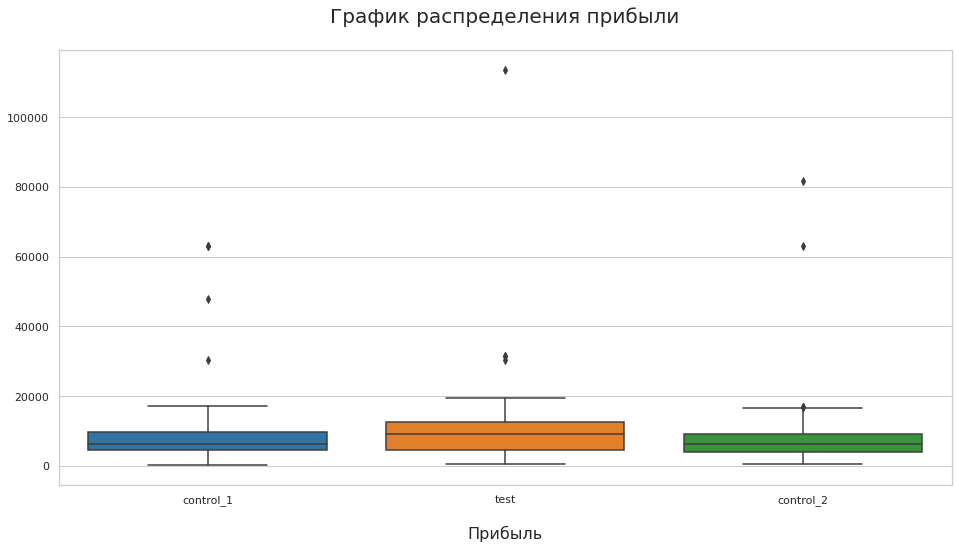

In [584]:
# Проверим распределения стоимстей премиум-подписки у каждой группы пользователей

# Изменяем размер графика
plt.figure(figsize=(16, 8))                    
sns.set(style='whitegrid', palette=None)

# Построим барплот
sns.boxplot(data=general_newusers, y="revenue", x="group")

# Затюним график
plt.title('График распределения прибыли\n', fontsize=20)
plt.xlabel('Прибыль', fontsize=16, rotation=0, labelpad=20)
plt.ylabel('', fontsize=16, rotation=0, labelpad=35)

Text(0, 0.5, '')

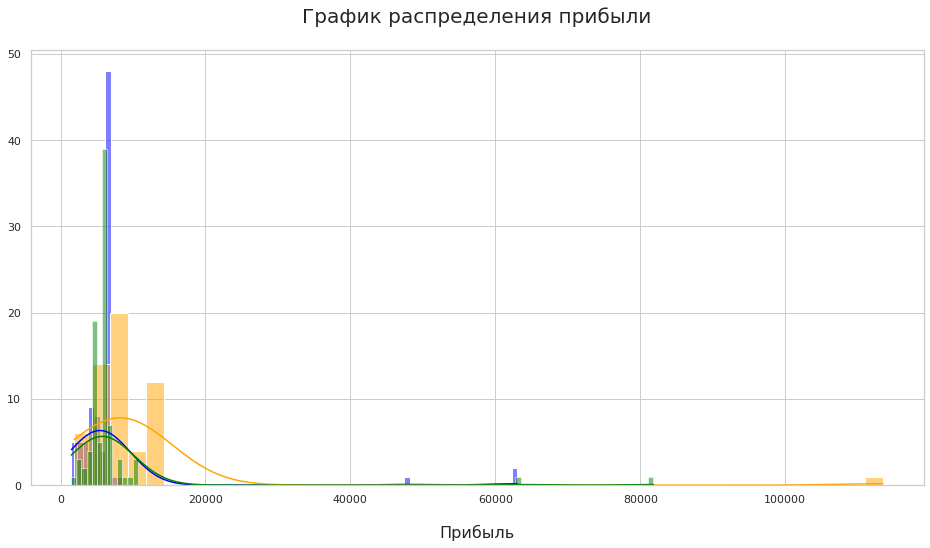

In [585]:
# Проверим распределения стоимстей премиум-подписки у каждой группы пользователей

# Изменяем размер графика
plt.figure(figsize=(16, 8))                    
sns.set(style='whitegrid', palette=None)

# Построим барплот
sns.histplot(data=control_1_premium_newusers.revenue, kde=True, color="blue")
sns.histplot(data=test_premium_newusers.revenue, kde=True, color="orange")
sns.histplot(data=control_2_premium_newusers.revenue, kde=True, color="green")

# Затюним график
plt.title('График распределения прибыли\n', fontsize=20)
plt.xlabel('Прибыль', fontsize=16, rotation=0, labelpad=20)
plt.ylabel('', fontsize=16, rotation=0, labelpad=35)

<b>Для выполнения ANOVA теста </b> проверим условия:
    1. Распределения нормальны или размер выборки > 30
    2. Дисперсии распределений однородны

<b>Проверим размеры выборок распределений!</b><br>

In [586]:
print("Размеры выборок:\
\nв группе test = {}, \
\nв группе control_1 = {}, \
\nв группе control_2 = {}."\
                  .format(test_premium_newusers.shape[0],\
                                  control_1_premium_newusers.shape[0],\
                                  control_2_premium_newusers.shape[0]))

Размеры выборок:
в группе test = 57, 
в группе control_1 = 89, 
в группе control_2 = 90.


<b>Проверим нормальность распределений!</b><br>
Cформулируем H0 для нормальности распределений - распределение нормально распределено.<br>
Cформулируем H1 для нормальности распределений - распределение не нормально распределено.

In [587]:
# Нормальность, используем levene тк выборка небольшого размера
print("P-value в группе test = {}".format(ss.shapiro(test_premium_newusers.revenue).pvalue))
print("P-value в группе control_1 = {}".format(ss.shapiro(control_1_premium_newusers.revenue).pvalue))
print("P-value в группе control_2 = {}".format(ss.shapiro(control_2_premium_newusers.revenue).pvalue))
print("Распределения revenue распределены не нормально, тк pvalue < 0.05.")

P-value в группе test = 3.1585668020699727e-15
P-value в группе control_1 = 9.327743536484844e-19
P-value в группе control_2 = 2.2637283802676784e-19
Распределения revenue распределены не нормально, тк pvalue < 0.05.


<b>Проверим гомогенность дисперсий распределений!</b><br>
Cформулируем H0 для гомогенности дисперсий - дисперсии гомогенны.<br>
Cформулируем H1 для гомогенности дисперсий - дисперсии не гомогенны.

In [588]:
# Нормальность, используем levene тк выборка небольшого размера
print("P-value дисперсий в группах test, control_1 и control_2 = {}".format(ss.levene(test_premium_newusers.revenue,\
                                                                                                                                                                        control_1_premium_newusers.revenue, \
                                                                                                                                                                        control_2_premium_newusers.revenue).pvalue))
print("Распределения дисперсий revenue гомогенны, тк pvalue > 0.05.")

P-value дисперсий в группах test, control_1 и control_2 = 0.5777227973875312
Распределения дисперсий revenue гомогенны, тк pvalue > 0.05.


В размеры выборок в группах > 30, то не сильно важно соблюдать уловие нормальности распределений, а также дисперсии распределений однородны.<br>
Поэтому можно использовать ANOVA-анализ для 3-ех групп, для определения стат. различий между средними значениями в этих распределениях.<br>

<b>Однофакторный ANOVA.</b><br>
Cформулируем H0 для ANOVA - средние значения revenue равны во всех группах.<br>
Cформулируем H1 для ANOVA - средние значения revenue отличается хотя бы в 1 группе.

In [589]:
print("P-value однофакторного ANOVA в группах test, control_1 и control_2 = {}."\
      .format(ss.f_oneway(test_premium_newusers.revenue,\
                                                 control_1_premium_newusers.revenue,\
                                                 control_2_premium_newusers.revenue)\
                                                .pvalue))
print("Различия средних значений revenue не стат. значимы, тк pvalue > 0.05. Т.е. нет оснований отбрасывать H0 и принимать H1.")

P-value однофакторного ANOVA в группах test, control_1 и control_2 = 0.2481307971159107.
Различия средних значений revenue не стат. значимы, тк pvalue > 0.05. Т.е. нет оснований отбрасывать H0 и принимать H1.


<h3> A/B тест на пр.гипотезу (повышение стоимости премиум-подписки - ухудшение конверсии в первую покупку премиум подписки)

In [590]:
# Посчитаем количество новых пользователей (т.е. имеют колонку "joined_at") в тестовой группе
test_newusers = test\
                                                                        .query("joined_at != 'NaT'")\
                                                                        .sort_values("paid_at", ascending=True)\
                                                                        .drop_duplicates(subset='uid', keep="first")

In [591]:
#  Конверсия нового юзера (зарегистрированного) с первой покупки сразу в премиум-подписку в тестовой группе
test_CR_firstpay_inpremium = (test_premium_newusers.uid.nunique() / test_newusers.uid.nunique()) * 100

print("Конверсия: \nв test группе {},\
                                    \nв control_1 группе {},\
                                    \nв control_2 группе {}."\
          .format(round(test_CR_firstpay_inpremium, 2),\
                          round(control_1_CR_firstpay_inpremium, 2),\
                          round(control_2_CR_firstpay_inpremium, 2)))

Конверсия: 
в test группе 39.04,                                    
в control_1 группе 46.11,                                    
в control_2 группе 48.13.


Создадим кросс-таблицу контрольных групп с конверсией пользователей.

In [592]:
cross_cr_t = pd.DataFrame({     'group' : ['test', 'test', 'control_1', 'control_1', 'control_2', 'control_2'],
                                                        'users' : ['newusers', 'premium_newusers', 'newusers', 'premium_newusers', 'newusers', 'premium_newusers'],
                                                        'num' : [test_newusers.uid.nunique(), test_premium_newusers.uid.nunique(), control_1_newusers.uid.nunique(), control_1_premium_newusers.uid.nunique(), control_2_newusers.uid.nunique(), control_2_premium_newusers.uid.nunique()]
                                                    })
cross_cr_t

,group,users,num
0,test,newusers,146
1,test,premium_newusers,57
2,control_1,newusers,193
3,control_1,premium_newusers,89
4,control_2,newusers,187
5,control_2,premium_newusers,90


In [593]:
cross_cr_t = pd.crosstab(cross_cr_t.users, cross_cr_t.group)
cross_cr_t.test = [test_newusers.uid.nunique(), test_premium_newusers.uid.nunique()]
cross_cr_t.control_1 = [control_1_newusers.uid.nunique(), control_1_premium_newusers.uid.nunique()]
cross_cr_t.control_2 = [control_2_newusers.uid.nunique(), control_2_premium_newusers.uid.nunique()]
cross_cr_t

group,control_1,control_2,test
users,,,
newusers,193,187,146
premium_newusers,89,90,57


Выдвинем гипотезы для использования <b>критерия Хи-квадрат</b> для категориальной переменной "users":
    
- H0 - статзначимых различий в CR нет;
- H1 - статзначимые различия в CR есть.

<b>Для использования критерия Хи-квадрат выполняются следующие условия</b>:
1. Все наблюдения независимы;
2. Количество наблюдений в каждой группе > 5.

In [594]:
stat, p, dof, expected = chi2_contingency(cross_cr_t)
print("P-value критерия Хи-квадрат группах test, control_1 и control_2 = {}".format(p))
print("Различия CR не стат. значимы, тк pvalue > 0.05.")

P-value критерия Хи-квадрат группах test, control_1 и control_2 = 0.5656954261867887
Различия CR не стат. значимы, тк pvalue > 0.05.


<h2><u>Вывод:</h2></u>

<b>На основе проведенного анализа 2 контрольных и 1 тестовой группы можно сделать следующие выводы:
- Система сплитования правильно - контрольные группы распределены однородно, случайно и равномерно.
- Очень много битых данных в исходных таблицах, из-за этого призодится проверять каждую колонку на правильность данных.
- Средняя выручка на пользователя cтат. значимо не изменилась при увеличении стоимости премиум-подписки.
- Конверсия пользователя в первую покупку сразу премиум-подписки при увеличении ее стоимости cтат. значимо не изменилась.   
    
Итого: тестовую версию выкатывать нецелесообрано!